In [2]:
# Cross-Lingual RSC Core Experiment (Massively Expanded Version)
# Author: Erich Curtis

import random
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# ------------------- Expanded Vocabulary and Mappings -------------------

english_vocab = [
    'dog', 'cat', 'horse', 'fish', 'bird', 'eagle', 'lion', 'tiger', 'whale', 'elephant',
    'chair', 'table', 'computer', 'phone', 'book', 'pen', 'car', 'airplane', 'bike', 'bridge',
    'run', 'jump', 'swim', 'fly', 'eat', 'sleep', 'drive', 'build', 'teach', 'learn',
    'happy', 'sad', 'angry', 'afraid', 'proud', 'ashamed', 'excited', 'calm',
    'house', 'school', 'city', 'village', 'river', 'mountain', 'valley', 'desert', 'ocean',
    'morning', 'night', 'today', 'yesterday', 'soon', 'later', 'early', 'late',
    'I', 'you', 'we', 'he', 'she', 'it', 'they',
    'my', 'your', 'our', 'his', 'her', 'its', 'their',
    'can', 'must', 'want', 'need', 'should',
    'truth', 'idea', 'hope', 'fear', 'knowledge', 'power', 'energy', 'science', 'music', 'art',
    'engineer', 'scientist', 'musician', 'artist', 'teacher', 'student', 'parent', 'child', 'friend', 'enemy',
    'love', 'help', 'comfort', 'protect', 'guide', 'trust', 'know', 'think', 'believe', 'feel', 'say', 'speak',
    'food', 'water', 'fire', 'earth', 'sun', 'moon', 'star', 'cloud', 'wind', 'storm',
    'rain', 'snow', 'ice', 'heat', 'cold', 'breeze', 'fog', 'lightning', 'thunder', 'weather',
    'doghouse', 'barn', 'market', 'hospital', 'station', 'castle', 'hut', 'tent',
    'small', 'big', 'fast', 'slow', 'bright', 'dark', 'loud', 'quiet', 'soft', 'hard',
    'across', 'under', 'over', 'through', 'beside', 'near', 'around', 'between', 'inside', 'outside',
    'above', 'below', 'behind', 'ahead', 'toward', 'away', 'within', 'without',
    'money', 'gold', 'silver', 'stone', 'wood', 'metal', 'glass', 'sand', 'soil', 'air',
    'strong', 'weak', 'heavy', 'light', 'sharp', 'dull', 'smooth', 'rough',
    'begin', 'end', 'continue', 'stop', 'wait', 'move', 'turn', 'open', 'close',
    'question', 'answer', 'discussion', 'argument', 'story', 'poem', 'song', 'melody',
    'job', 'work', 'play', 'game', 'match', 'battle', 'fight', 'war', 'peace',
    'soldier', 'king', 'queen', 'leader', 'follower', 'group', 'crowd', 'army', 'team',
    'sky', 'ground', 'road', 'path', 'street', 'bridge', 'tunnel', 'building', 'tower',
    'listen', 'look', 'watch', 'see', 'hear', 'touch', 'smell', 'taste',
    'walk', 'run', 'jump', 'crawl', 'swim', 'climb', 'fall', 'rise',
    'remember', 'forget', 'understand', 'misunderstand',
    'buy', 'sell', 'trade', 'exchange',
    'start', 'finish', 'win', 'lose',
    'create', 'destroy', 'build', 'break',
    'read', 'write', 'draw', 'paint', 'sing', 'dance', 'laugh', 'cry',
    'live', 'die', 'grow', 'shrink', 'appear', 'disappear'
]


eng_to_ger = {
    'dog': 'Hund', 'cat': 'Katze', 'horse': 'Pferd', 'fish': 'Fisch', 'bird': 'Vogel', 'eagle': 'Adler', 'lion': 'Löwe',
    'tiger': 'Tiger', 'whale': 'Wal', 'elephant': 'Elefant', 'chair': 'Stuhl', 'table': 'Tisch', 'computer': 'Computer',
    'phone': 'Telefon', 'book': 'Buch', 'pen': 'Stift', 'car': 'Auto', 'airplane': 'Flugzeug', 'bike': 'Fahrrad',
    'bridge': 'Brücke', 'run': 'laufen', 'jump': 'springen', 'swim': 'schwimmen', 'fly': 'fliegen', 'eat': 'essen',
    'sleep': 'schlafen', 'drive': 'fahren', 'build': 'bauen', 'teach': 'lehren', 'learn': 'lernen',
    'happy': 'glücklich', 'sad': 'traurig', 'angry': 'wütend', 'afraid': 'ängstlich', 'proud': 'stolz',
    'ashamed': 'beschämt', 'excited': 'aufgeregt', 'calm': 'ruhig', 'house': 'Haus', 'school': 'Schule', 'city': 'Stadt',
    'village': 'Dorf', 'river': 'Fluss', 'mountain': 'Berg', 'valley': 'Tal', 'desert': 'Wüste', 'ocean': 'Ozean',
    'morning': 'Morgen', 'night': 'Nacht', 'today': 'heute', 'yesterday': 'gestern', 'soon': 'bald', 'later': 'später',
    'early': 'früh', 'late': 'spät', 'I': 'ich', 'you': 'du', 'we': 'wir', 'he': 'er', 'she': 'sie', 'it': 'es',
    'they': 'sie', 'my': 'mein', 'your': 'dein', 'our': 'unser', 'his': 'sein', 'her': 'ihr', 'its': 'sein',
    'their': 'ihr', 'can': 'können', 'must': 'müssen', 'want': 'wollen', 'need': 'brauchen', 'should': 'sollen',
    'truth': 'Wahrheit', 'idea': 'Idee', 'hope': 'Hoffnung', 'fear': 'Angst', 'knowledge': 'Wissen', 'power': 'Macht',
    'energy': 'Energie', 'science': 'Wissenschaft', 'music': 'Musik', 'art': 'Kunst',
    'engineer': 'Ingenieur', 'scientist': 'Wissenschaftler', 'musician': 'Musiker', 'artist': 'Künstler',
    'teacher': 'Lehrer', 'student': 'Student', 'parent': 'Elternteil', 'child': 'Kind', 'friend': 'Freund', 'enemy': 'Feind',
    'love': 'lieben', 'help': 'helfen', 'comfort': 'trösten', 'protect': 'beschützen', 'guide': 'führen',
    'trust': 'vertrauen', 'know': 'wissen', 'think': 'denken', 'believe': 'glauben', 'feel': 'fühlen', 'say': 'sagen',
    'speak': 'sprechen', 'food': 'Essen', 'water': 'Wasser', 'fire': 'Feuer', 'earth': 'Erde', 'sun': 'Sonne',
    'moon': 'Mond', 'star': 'Stern', 'cloud': 'Wolke', 'wind': 'Wind', 'storm': 'Sturm',
    'rain': 'Regen', 'snow': 'Schnee', 'ice': 'Eis', 'heat': 'Hitze', 'cold': 'Kälte', 'breeze': 'Brise', 'fog': 'Nebel',
    'lightning': 'Blitz', 'thunder': 'Donner', 'weather': 'Wetter', 'doghouse': 'Hundehütte', 'barn': 'Scheune',
    'market': 'Markt', 'hospital': 'Krankenhaus', 'station': 'Station', 'castle': 'Schloss', 'hut': 'Hütte',
    'tent': 'Zelt', 'small': 'klein', 'big': 'groß', 'fast': 'schnell', 'slow': 'langsam', 'bright': 'hell',
    'dark': 'dunkel', 'loud': 'laut', 'quiet': 'leise', 'soft': 'weich', 'hard': 'hart',
    'across': 'über', 'under': 'unter', 'over': 'über', 'through': 'durch', 'beside': 'neben', 'near': 'in der Nähe von',
    'around': 'um', 'between': 'zwischen', 'inside': 'innen', 'outside': 'außen', 'above': 'über', 'below': 'unter',
    'behind': 'hinter', 'ahead': 'vorwärts', 'toward': 'zu', 'away': 'weg', 'within': 'innerhalb', 'without': 'ohne',
    'money': 'Geld', 'gold': 'Gold', 'silver': 'Silber', 'stone': 'Stein', 'wood': 'Holz', 'metal': 'Metall',
    'glass': 'Glas', 'sand': 'Sand', 'soil': 'Boden', 'air': 'Luft',
    'strong': 'stark', 'weak': 'schwach', 'heavy': 'schwer', 'light': 'leicht', 'sharp': 'scharf', 'dull': 'stumpf',
    'smooth': 'glatt', 'rough': 'rau'
}


german_vocab = list(set(eng_to_ger.values()))

relations = [

    # --- Simple Relations (20) ---
    ('dog', 'chase', 'cat'),
    ('child', 'build', 'sandcastle'),
    ('bird', 'fly', 'sky'),
    ('fish', 'swim', 'river'),
    ('teacher', 'teach', 'student'),
    ('parent', 'love', 'child'),
    ('sun', 'shine', 'earth'),
    ('rain', 'fall', 'ground'),
    ('farmer', 'grow', 'food'),
    ('artist', 'paint', 'picture'),
    ('musician', 'play', 'guitar'),
    ('lion', 'hunt', 'deer'),
    ('student', 'learn', 'lesson'),
    ('engineer', 'build', 'bridge'),
    ('river', 'flow', 'valley'),
    ('fire', 'burn', 'wood'),
    ('bird', 'sing', 'song'),
    ('horse', 'carry', 'rider'),
    ('car', 'drive', 'road'),
    ('dog', 'guard', 'house'),

    # --- Medium Relations (20) ---
    ('scientist', 'study', 'gravity', 'carefully'),
    ('child', 'draw', 'picture', 'with crayons'),
    ('friend', 'comfort', 'friend', 'during storm'),
    ('student', 'answer', 'question', 'correctly'),
    ('teacher', 'explain', 'concept', 'clearly'),
    ('dog', 'bark', 'loudly', 'at stranger'),
    ('musician', 'compose', 'melody', 'at night'),
    ('parent', 'guide', 'child', 'gently'),
    ('fire', 'burn', 'brightly', 'at night'),
    ('river', 'overflow', 'banks', 'after rain'),
    ('rain', 'soak', 'soil', 'quickly'),
    ('wind', 'blow', 'clouds', 'away'),
    ('soldier', 'defend', 'city', 'bravely'),
    ('worker', 'build', 'tower', 'high'),
    ('child', 'climb', 'tree', 'easily'),
    ('bird', 'nest', 'tree', 'in spring'),
    ('star', 'shine', 'bright', 'at night'),
    ('fox', 'hide', 'in bushes', 'silently'),
    ('dog', 'dig', 'hole', 'quickly'),
    ('teacher', 'correct', 'homework', 'patiently'),

    # --- Complex Relations (20) ---
    ('if', 'rain', 'then', 'ground becomes wet'),
    ('if', 'teacher', 'encourage', 'student', 'then', 'student succeed'),
    ('because', 'fire', 'burn', 'forest', 'animals flee'),
    ('child', 'believe', 'monster', 'under bed', 'at night'),
    ('scientist', 'discover', 'new element', 'after research'),
    ('bird', 'fly', 'across river', 'to find food'),
    ('friend', 'help', 'friend', 'because of danger'),
    ('parent', 'protect', 'child', 'from cold'),
    ('sun', 'cause', 'ice', 'to melt'),
    ('wind', 'carry', 'seeds', 'to new land'),
    ('teacher', 'believe', 'student', 'can succeed'),
    ('river', 'carve', 'valley', 'over time'),
    ('clouds', 'cover', 'sun', 'before storm'),
    ('artist', 'imagine', 'painting', 'before drawing'),
    ('child', 'fear', 'darkness', 'at night'),
    ('music', 'inspire', 'people', 'to dance'),
    ('earthquake', 'shake', 'city', 'suddenly'),
    ('parent', 'teach', 'child', 'how to read'),
    ('student', 'study', 'history', 'for exam'),
    ('fox', 'escape', 'hunter', 'by hiding'),

    # --- Special Groundings / Ambiguous (10) ---
    ('bank', 'store', 'money'),
    ('bank', 'stand', 'beside', 'river'),
    ('light', 'shine', 'sun'),
    ('light', 'carry', 'little weight'),
    ('rock', 'sit', 'in river'),
    ('rock', 'roll', 'down hill'),
    ('spring', 'bubble', 'from ground'),
    ('spring', 'arrive', 'after winter'),
    ('bear', 'fish', 'river'),
    ('bear', 'endure', 'cold')

]

# ------------------- Agent Initialization -------------------

random.seed(42)

agent_a_groundings = {word: word for word in english_vocab}
agent_b_groundings = {}
for word in english_vocab:
    if random.random() < 0.8:
        agent_b_groundings[word] = eng_to_ger[word]
    else:
        agent_b_groundings[word] = random.choice(german_vocab)

agent_c_groundings = {}
for word in english_vocab:
    if random.random() < 0.3:
        agent_c_groundings[word] = eng_to_ger[word]
    else:
        agent_c_groundings[word] = random.choice(german_vocab)

# ------------------- Learning Loop -------------------

total_frames = 2000
batch_size = 5
stability_threshold = 3

stability_counter_ab = {}
stability_counter_ac = {}
accuracy_over_time_ab = []
accuracy_over_time_ac = []

# Validation Functions
def validate_meaning(words, groundings):
    mapped = tuple(groundings.get(w, w) for w in words)
    ground_truth = [(eng_to_ger.get(r[0], r[0]), eng_to_ger.get(r[1], r[1]), eng_to_ger.get(r[2], r[2])) for r in relations]
    return mapped in ground_truth

def validate_syntax(words):
    return True

for frame in tqdm(range(total_frames), desc="Learning Frames"):
    proposals = random.sample(relations, batch_size)
    accepted_ab = 0
    accepted_ac = 0

    for prop in proposals:
        if validate_meaning(prop, agent_b_groundings) and validate_syntax(prop):
            stability_counter_ab[prop] = stability_counter_ab.get(prop, 0) + 1
            accepted_ab += 1

        if validate_meaning(prop, agent_c_groundings) and validate_syntax(prop):
            stability_counter_ac[prop] = stability_counter_ac.get(prop, 0) + 1
            accepted_ac += 1

    accuracy_over_time_ab.append(accepted_ab / batch_size)
    accuracy_over_time_ac.append(accepted_ac / batch_size)

    if frame % 25 == 0 and frame != 0:
        for word in random.sample(list(agent_c_groundings.keys()), 5):
            agent_c_groundings[word] = random.choice(german_vocab)

# ------------------- Output -------------------

plt.figure(figsize=(12,6))
plt.plot(range(total_frames), [sum(accuracy_over_time_ab[:i+1])/(i+1) for i in range(total_frames)], label='Agent A ↔ B', color='green')
plt.plot(range(total_frames), [sum(accuracy_over_time_ac[:i+1])/(i+1) for i in range(total_frames)], label='Agent A ↔ C', color='red')
plt.xlabel('Frames')
plt.ylabel('Cumulative Accuracy')
plt.title('Cross-Lingual RSC Convergence (Expanded Dataset)')
plt.legend()
plt.grid()
plt.ylim(0,1)
plt.tight_layout()
plt.show()

# Saving logs
with open('meaning_stability_ab_full.txt', 'w', encoding='utf-8') as f:
    for key, val in stability_counter_ab.items():
        f.write(f"{key}: {val}\n")

with open('meaning_stability_ac_full.txt', 'w', encoding='utf-8') as f:
    for key, val in stability_counter_ac.items():
        f.write(f"{key}: {val}\n")

KeyError: 'begin'

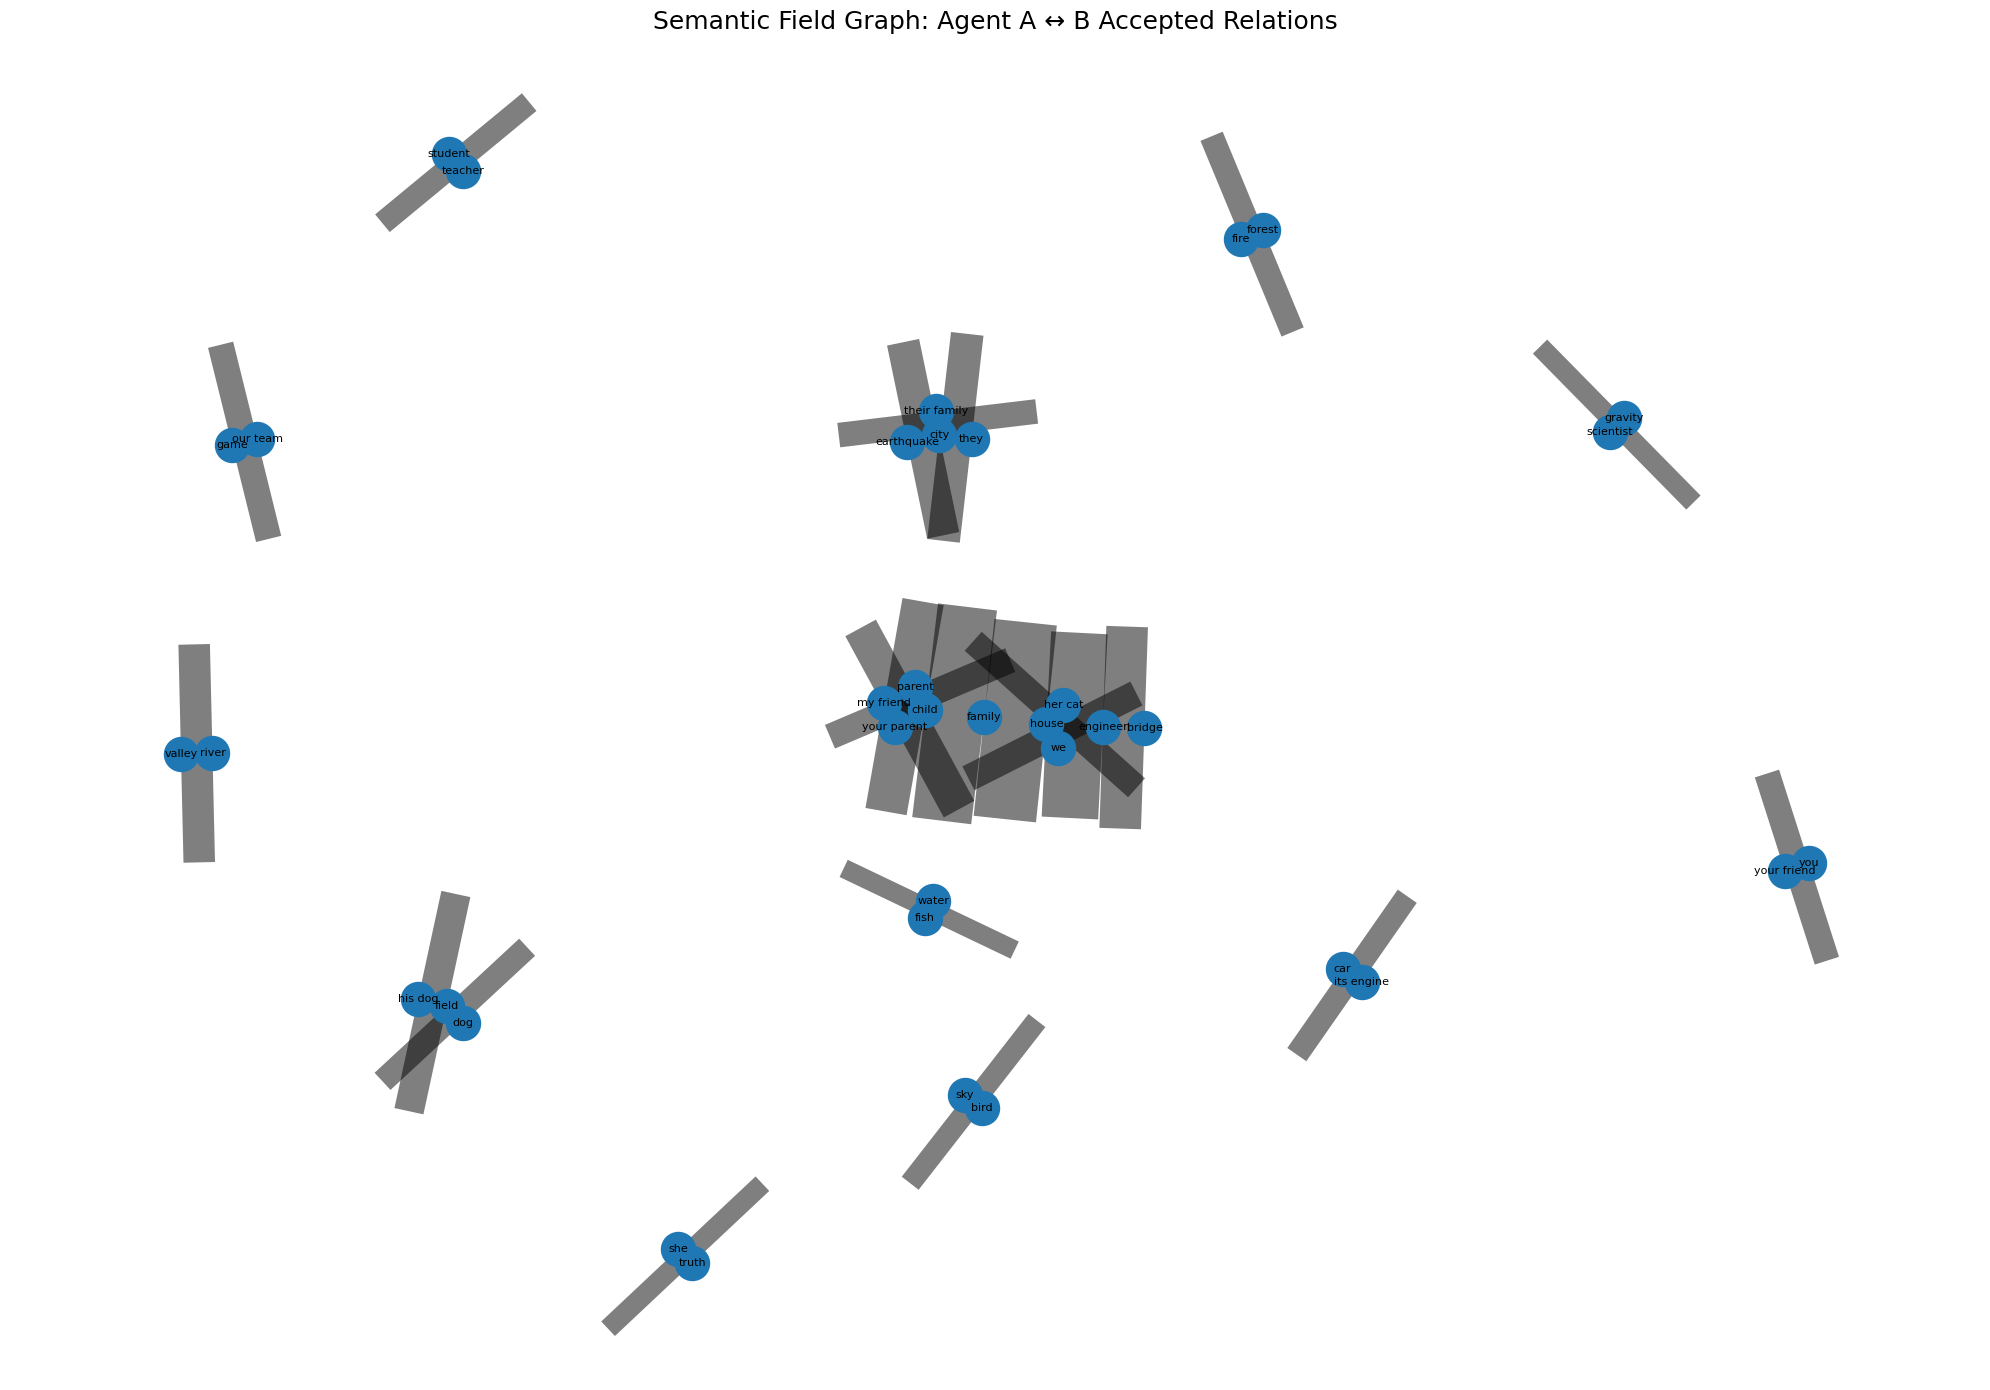

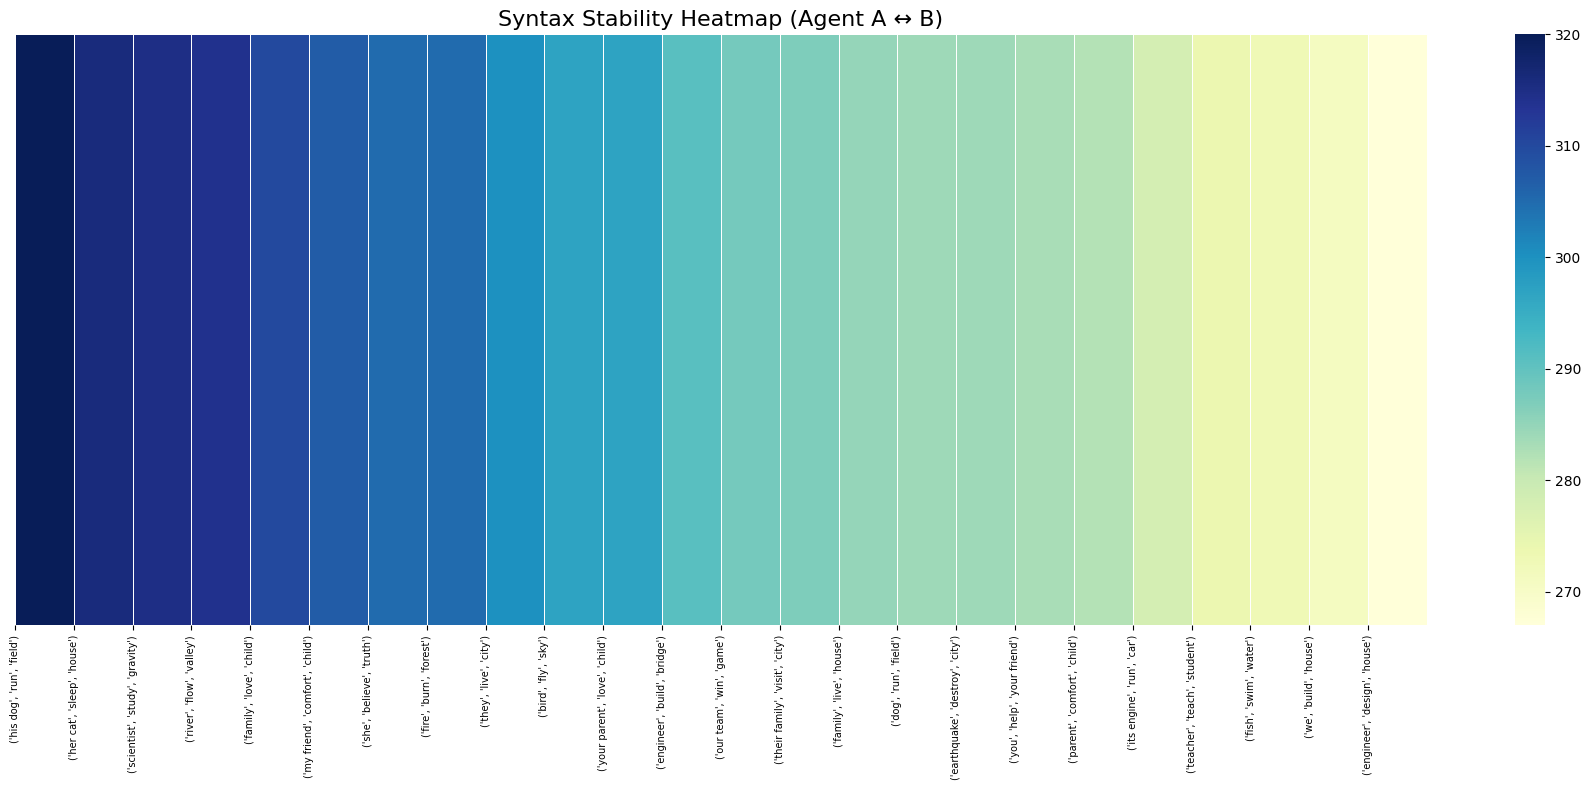

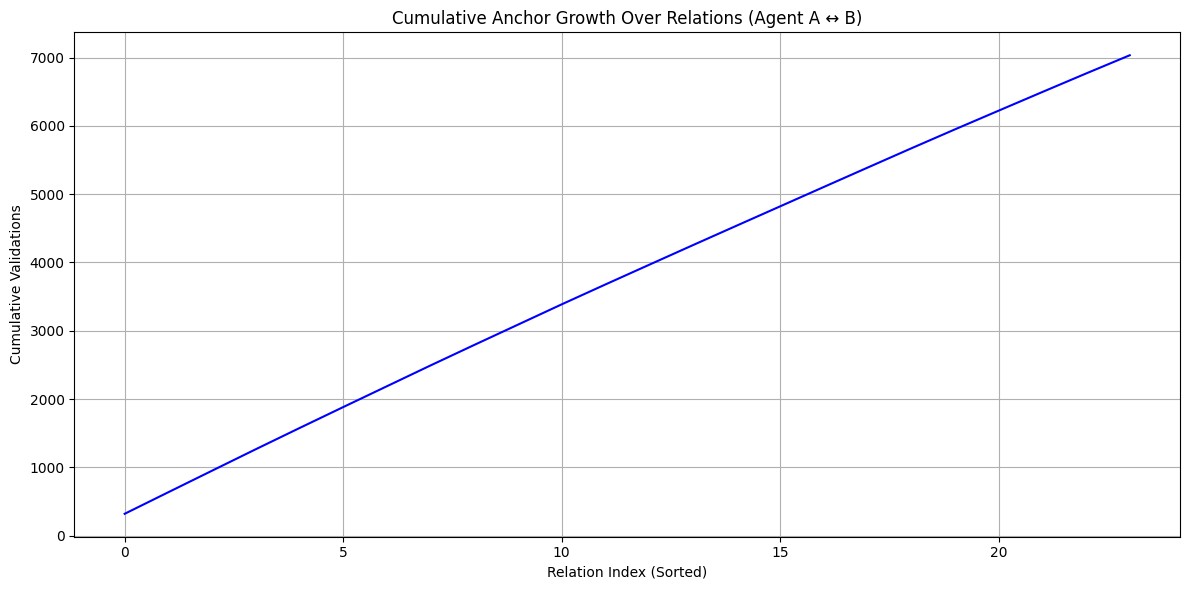

In [ ]:
# RSC Cross-Lingual Visualization Script
# Visuals for Expanded Dataset

import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import seaborn as sns

# ------------------- Load Logs -------------------

# Load meaning stability logs
stability_ab = {}
with open('meaning_stability_ab_full.txt', 'r', encoding='utf-8') as f:
    for line in f:
        parts = line.strip().split(':')
        relation = eval(parts[0].strip())
        count = int(parts[1].strip())
        stability_ab[relation] = count

stability_ac = {}
with open('meaning_stability_ac_full.txt', 'r', encoding='utf-8') as f:
    for line in f:
        parts = line.strip().split(':')
        relation = eval(parts[0].strip())
        count = int(parts[1].strip())
        stability_ac[relation] = count

# ------------------- Semantic Field Graph -------------------

G_semantic = nx.Graph()

for relation, count in stability_ab.items():
    G_semantic.add_edge(relation[0], relation[2], weight=count)

plt.figure(figsize=(20,14))
pos = nx.spring_layout(G_semantic, seed=42, k=0.5)
weights = [G_semantic[u][v]['weight'] for u,v in G_semantic.edges()]
nx.draw_networkx_nodes(G_semantic, pos, node_size=600)
nx.draw_networkx_edges(G_semantic, pos, width=[w/2 for w in weights], alpha=0.5)
nx.draw_networkx_labels(G_semantic, pos, font_size=8)
plt.title('Semantic Field Graph: Agent A ↔ B Accepted Relations', fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()

# ------------------- Syntax Stability Heatmap -------------------

df_stability = pd.DataFrame(sorted(stability_ab.items(), key=lambda x: -x[1]), columns=['Relation', 'Validations'])

plt.figure(figsize=(18,8))
sns.heatmap(df_stability[['Validations']].T, cmap="YlGnBu", cbar=True, annot=False, linewidths=.5)
plt.xticks(ticks=range(len(df_stability)), labels=[str(rel) for rel in df_stability['Relation']], rotation=90, fontsize=7)
plt.title('Syntax Stability Heatmap (Agent A ↔ B)', fontsize=16)
plt.yticks([])
plt.tight_layout()
plt.show()

# ------------------- Anchor Timeline Cumulative Plot -------------------

# Simple fake frames based on sorted validations
cumulative_validations = df_stability['Validations'].cumsum()
frames = range(len(cumulative_validations))

plt.figure(figsize=(12,6))
plt.plot(frames, cumulative_validations, color='blue')
plt.xlabel('Relation Index (Sorted)')
plt.ylabel('Cumulative Validations')
plt.title('Cumulative Anchor Growth Over Relations (Agent A ↔ B)')
plt.grid(True)
plt.tight_layout()
plt.show()
